In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import random
import mofr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_tree
from lightgbm import LGBMClassifier, plot_tree #LGBMRanker
import math
import pickle
import statsmodels.api as sm


import xgboost as xgb
from sklearn.metrics import brier_score_loss

In [3]:
seed=1234

# Loading data

In [4]:
import os
os.getcwd()

'C:\\Users\\AZUBA\\Documents\\Data_science\\Kaggle\\8.March ML Mania 2023'

In [5]:
df=pd.read_csv(os.getcwd()+r'\Dataset_for_modelling.csv')

In [6]:
df.head()

,Target,TeamID1,TeamID2,Season,DayNum,min_MOR_1,min_SAG_1,min_WLK_1,max_MOR_1,max_SAG_1,...,together_number_of_wins,together_winning_percentage,Seed_number_1,Seed_number_2,Avg_points_difference,Avg_points_ratio,Wins_difference,Wins_percentage_ratio,Seeds_difference,Seeds_ratio
0,1,1116,1234,1985,136,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,9,8,-4.400000,0.936902,1.050000,0.954545,1,1.125000
1,1,1120,1345,1985,136,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11,6,1.224828,1.017720,1.058824,0.912779,5,1.833333
2,1,1207,1250,1985,136,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,16,9.982120,1.151799,2.272727,2.441077,-15,0.062500
3,1,1229,1425,1985,136,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9,8,3.199735,1.046785,1.052632,1.091618,1,1.125000
4,1,1242,1325,1985,136,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,14,8.477778,1.125493,1.150000,1.035000,-11,0.214286


In [7]:
file_name = "model1_males_lb.pkl"

In [8]:
df['Target'].value_counts()

1    1201
0    1183
Name: Target, dtype: int64

In [9]:
col_target='Target'
col_exclude=[
'TeamID1',
'TeamID2',

col_target,]

In [10]:
train_mask=((df['Season'])<2023)&((df['Season'])>=2003)
valid_mask=(df['Season'])>=2023

In [11]:
df[train_mask]['Target'].value_counts()

0    645
1    603
Name: Target, dtype: int64

In [12]:
df[valid_mask]['Target'].value_counts()

Series([], Name: Target, dtype: int64)

In [13]:
df['last_MOR_ratio']=df['last_MOR_1']/df['last_MOR_2']
df['last_SAG_ratio']=df['last_SAG_1']/df['last_SAG_2']
df['last_WLK_ratio']=df['last_WLK_1']/df['last_WLK_2']

# Data exploration

In [14]:
col_preds=[col for col in df.columns[3:] if col not in col_exclude]

In [15]:
len(col_preds)

56

In [16]:
col_preds

['Season',
 'DayNum',
 'min_MOR_1',
 'min_SAG_1',
 'min_WLK_1',
 'max_MOR_1',
 'max_SAG_1',
 'max_WLK_1',
 'mean_MOR_1',
 'mean_SAG_1',
 'mean_WLK_1',
 'first_MOR_1',
 'first_SAG_1',
 'first_WLK_1',
 'last_MOR_1',
 'last_SAG_1',
 'last_WLK_1',
 'min_MOR_2',
 'min_SAG_2',
 'min_WLK_2',
 'max_MOR_2',
 'max_SAG_2',
 'max_WLK_2',
 'mean_MOR_2',
 'mean_SAG_2',
 'mean_WLK_2',
 'first_MOR_2',
 'first_SAG_2',
 'first_WLK_2',
 'last_MOR_2',
 'last_SAG_2',
 'last_WLK_2',
 'Wins_1',
 'Losses_1',
 'Matches_1',
 'Points_1',
 'Avg_points_per_game_1',
 'Wins_2',
 'Losses_2',
 'Matches_2',
 'Points_2',
 'Avg_points_per_game_2',
 'together_matches_played',
 'together_number_of_wins',
 'together_winning_percentage',
 'Seed_number_1',
 'Seed_number_2',
 'Avg_points_difference',
 'Avg_points_ratio',
 'Wins_difference',
 'Wins_percentage_ratio',
 'Seeds_difference',
 'Seeds_ratio',
 'last_MOR_ratio',
 'last_SAG_ratio',
 'last_WLK_ratio']

In [17]:
col_preds=[
# 'Season',
#  'DayNum',
#  'min_MOR_1',
#  'min_SAG_1',
#  'min_WLK_1',
#  'max_MOR_1',
#  'max_SAG_1',
#  'max_WLK_1',
#  'mean_MOR_1',
#  'mean_SAG_1',
#  'mean_WLK_1',
#  'first_MOR_1',
#  'first_SAG_1',
#  'first_WLK_1',
 'last_MOR_1',
 'last_SAG_1',
 'last_WLK_1',
#  'min_MOR_2',
#  'min_SAG_2',
#  'min_WLK_2',
#  'max_MOR_2',
#  'max_SAG_2',
#  'max_WLK_2',
#  'mean_MOR_2',
#  'mean_SAG_2',
#  'mean_WLK_2',
#  'first_MOR_2',
#  'first_SAG_2',
#  'first_WLK_2',
 'last_MOR_2',
 'last_SAG_2',
 'last_WLK_2',
 'Wins_1',
 'Losses_1',
 'Matches_1',
 'Points_1',
 'Avg_points_per_game_1',
 'Wins_2',
 'Losses_2',
 'Matches_2',
 'Points_2',
 'Avg_points_per_game_2',
 'together_matches_played',
 'together_number_of_wins',
 'together_winning_percentage',
#  'Seed_number_1',
#  'Seed_number_2',
 'Avg_points_difference',
 'Avg_points_ratio',
 'Wins_difference',
 'Wins_percentage_ratio',
 'Seeds_difference',
 'Seeds_ratio',
 'last_MOR_ratio',
 'last_SAG_ratio',
 'last_WLK_ratio'
]

In [18]:
col_preds

['last_MOR_1',
 'last_SAG_1',
 'last_WLK_1',
 'last_MOR_2',
 'last_SAG_2',
 'last_WLK_2',
 'Wins_1',
 'Losses_1',
 'Matches_1',
 'Points_1',
 'Avg_points_per_game_1',
 'Wins_2',
 'Losses_2',
 'Matches_2',
 'Points_2',
 'Avg_points_per_game_2',
 'together_matches_played',
 'together_number_of_wins',
 'together_winning_percentage',
 'Avg_points_difference',
 'Avg_points_ratio',
 'Wins_difference',
 'Wins_percentage_ratio',
 'Seeds_difference',
 'Seeds_ratio',
 'last_MOR_ratio',
 'last_SAG_ratio',
 'last_WLK_ratio']

# XGBoost model

## Model fitting

In [19]:
xgb_model = XGBClassifier(max_depth=3, seed=seed, colsample_bytree=1, gamma=1, min_child_weight=5, n_estimators=5)
# xgb_model = XGBClassifier(**best_hyperparams)##

xgb_model.fit(df[train_mask].loc[:, col_preds], df[train_mask][col_target], verbose=0, eval_metric='auc')

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1234, ...)

In [20]:
df['XGB_SCORE']=xgb_model.predict_proba(df[xgb_model.feature_names_in_])[:, 1]


In [21]:
print('The Lift on the train set is: '+ str(mofr.metrics.lift(df[train_mask][col_target], df[train_mask]['XGB_SCORE'])))
print('The gini on the train set is: '+ str(mofr.metrics.gini(df[train_mask][col_target].apply(int), df[train_mask]['XGB_SCORE'])))
print('The Brier on the train set is: '+ str(brier_score_loss(df[train_mask][col_target].apply(int), df[train_mask]['XGB_SCORE'])))
print('\n')
print('The Lift on the valid set is: '+ str(mofr.metrics.lift(df[valid_mask][col_target], df[valid_mask]['XGB_SCORE'])))
print('The gini on the valid set is: '+ str(mofr.metrics.gini(df[valid_mask][col_target].apply(int), df[valid_mask]['XGB_SCORE'])))
print('The Brier on the valid set is: '+ str(brier_score_loss(df[valid_mask][col_target].apply(int), df[valid_mask]['XGB_SCORE'])))

The Lift on the train set is: 1.9780742306168275
The gini on the train set is: 0.6628639747001426
The Brier on the train set is: 0.1733951679751386




IndexError: index -1 is out of bounds for axis 0 with size 0

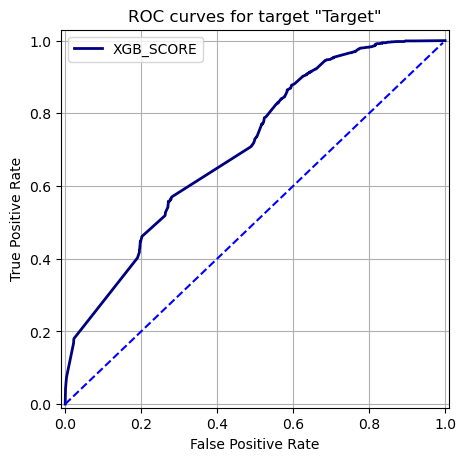

In [22]:
from mofr.basic_evaluators.ROCCurve import ROCCurveEvaluator
df['one']=1

rce=ROCCurveEvaluator()
rce.d(df).t([(col_target,'one')]).s(['XGB_SCORE'])
rce.get_graph()

del df['one']

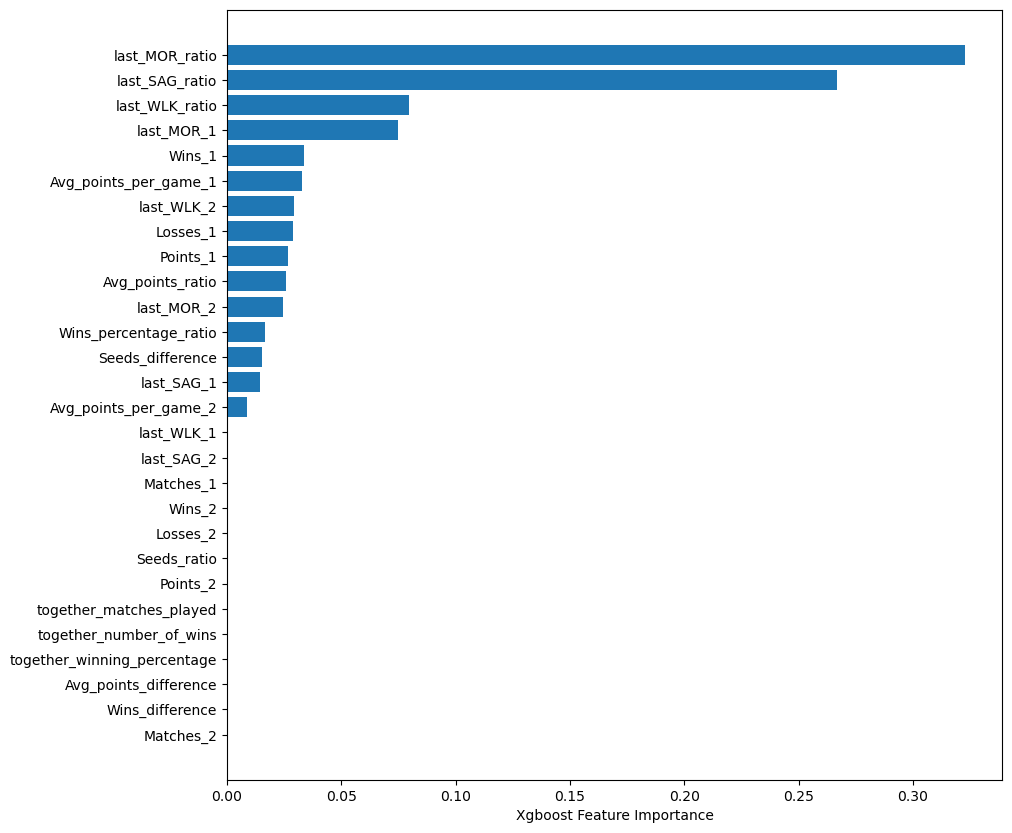

In [23]:
sorted_idx = xgb_model.feature_importances_.argsort()
order_ = []
for i in sorted_idx:
  order_.append(xgb_model.feature_names_in_[i])
plt.figure(figsize=(10, 10))
fig = plt.barh(order_, xgb_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.show()

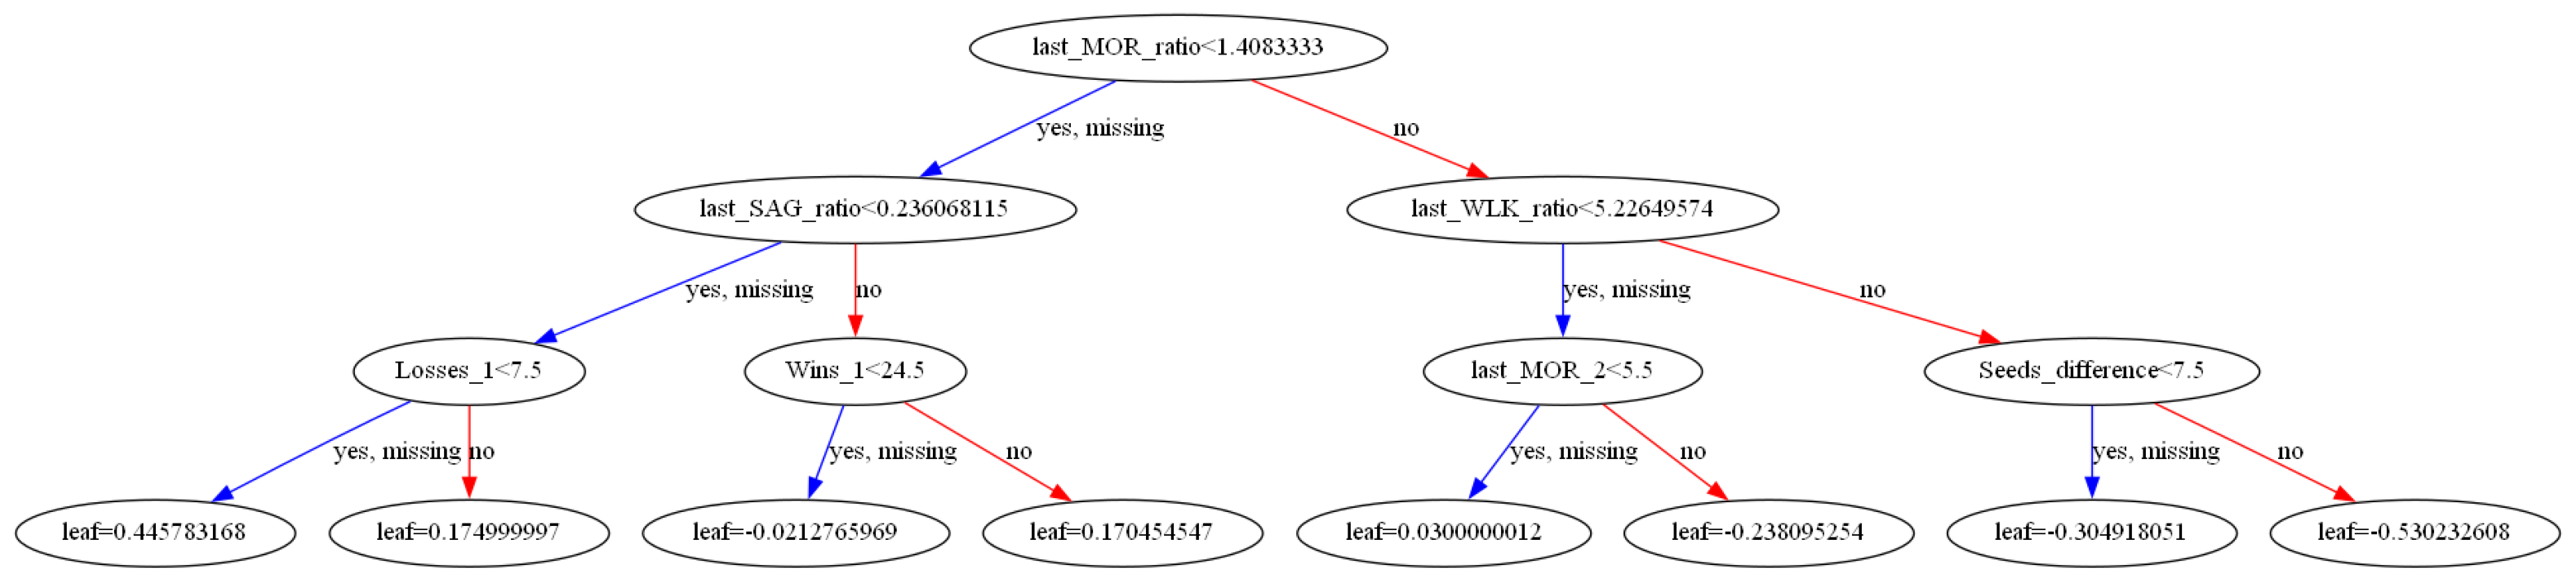

In [24]:
import os
os.environ["PATH"] += os.pathsep + 'c:/Program Files/Graphviz/bin/'

from xgboost import plot_tree
plt.rcParams["figure.figsize"] = (40,40)
plot_tree(xgb_model)
plt.show()

In [25]:
results=[]
for col in col_preds:
    results.append((col, np.abs(mofr.metrics.gini(df[col_target].fillna(999), df[col].fillna(999)))))
  
pd.DataFrame(results, columns=['Predictor', 'GINI']).sort_values(by='GINI', ascending=False)[0:30]

,Predictor,GINI
24,Seeds_ratio,0.566278
23,Seeds_difference,0.564160
21,Wins_difference,0.416566
22,Wins_percentage_ratio,0.352996
6,Wins_1,0.330708
7,Losses_1,0.302198
19,Avg_points_difference,0.295573
20,Avg_points_ratio,0.295557
11,Wins_2,0.272630
9,Points_1,0.241419


# Saving the model

In [26]:
#file_name = "otto_xgb_model_10_3weeks_no_nulls.pkl"

# save
pickle.dump(xgb_model, open(file_name, "wb"))

# # load
# #xgb_model= pickle.load(open(file_name, "rb"))

In [27]:
import shap  # package used to calculate Shap values
row_to_show = 1
data_for_prediction = df[col_preds].iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

# Create object that can calculate shap values
explainer = shap.TreeExplainer(xgb_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction_array)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

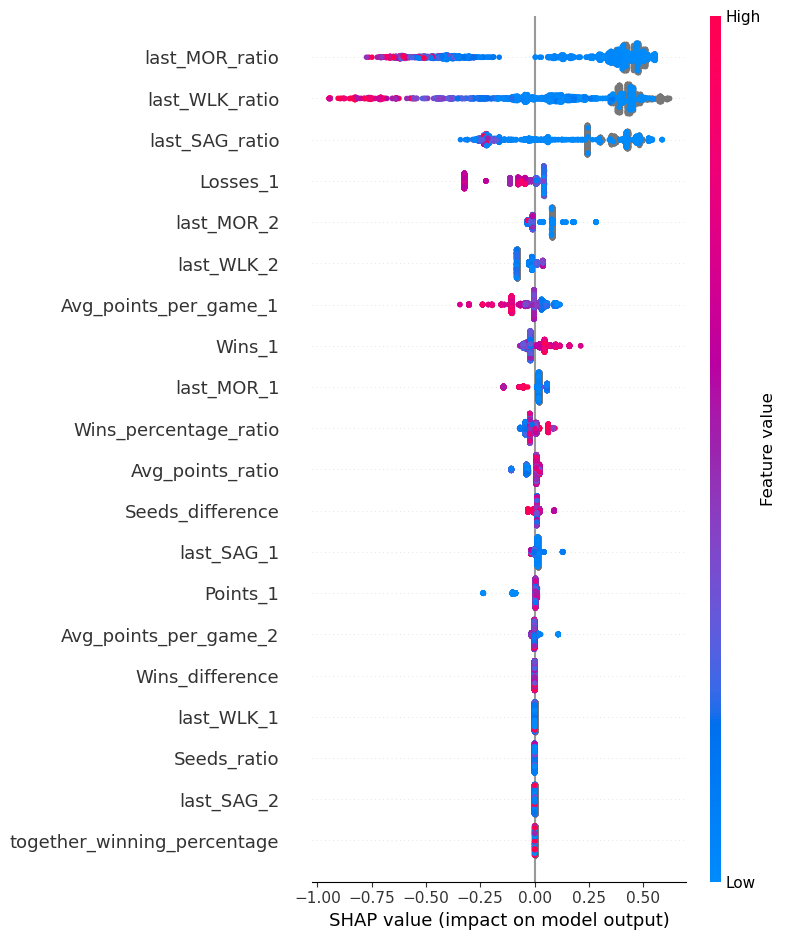

In [28]:
sample=df[col_preds]
shap_values = explainer.shap_values(sample)
shap.summary_plot(shap_values, sample[col_preds])